In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def get_homography(target,source):
    A = np.zeros((8,8))
    b = np.reshape(target,(8,1))
    for i in range(4):
        x1 = source[i,0]
        y1 = source[i,1]
        x2 = target[i,0]
        y2 = target[i,1]

        A[i*2,:] = [x1,y1,1,0,0,0,-x1*x2,-y1*x2]
        A[i*2+1,:] = [0,0,0,x1,y1,1,-x1*y2,-y1*y2]

        b[i*2] = x2
        b[i*2+1] = y2

    h = np.matmul(np.linalg.inv(A),b)
    h = np.append(h,1)
    H = np.reshape(h,(3,3))
    return H

In [3]:
def mapping(img_target,img_source,target,source,H):   
    img_new = img_target
    area = np.zeros(img_target.shape[:],dtype = np.uint8)
    border = np.expand_dims(source,axis=0)
    cv2.fillPoly(area,border,255)

    for j in range(img_target.shape[0]):
        for i in range(img_target.shape[1]):
            if area[j][i][0] == 255:
                input = np.array([i,j,1]).reshape((3,1))
                output = np.matmul(H,input)
                x2 = np.int(np.round(output[0]/output[2]))
                y2 = np.int(np.round(output[1]/output[2]))
                if (x2>0) and (x2<img_source.shape[1]) and (y2>0) and (y2<img_source.shape[0]):
                    img_new[j,i,:] = img_source[y2,x2,:]
    return img_new

In [5]:
img1 = np.array([[232,411],[134,1694],[1817,1991],[1926,195]])
img2 = np.array([[164,515],[174,2519],[1971,2095],[1968,635]])
img3 = np.array([[74,350],[66,1420],[1204,2067],[1372,105]])
img_cat = np.array([[100,100],[100,1000],[1800,1000],[1800,100]])

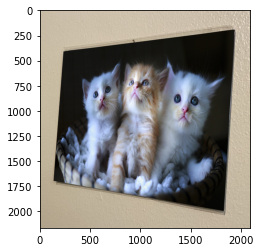

True

In [52]:
directory = "C:/Users/clare/OneDrive - purdue.edu/Desktop/ECE 661/hw2_Task1_Images/"
file_target = "painting1.jpeg"
file_source = "kittens.jpeg"
img_target = cv2.imread(directory+file_target,cv2.IMREAD_COLOR)
img_source = cv2.imread(directory+file_source,cv2.IMREAD_COLOR)

H = get_homography(img_cat,img1)
img_new = mapping(img_target,img_source,img_cat,img1,H)
plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite(directory+"task1a.jpeg", img_new) 

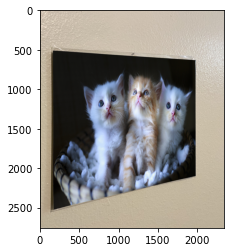

True

In [53]:
directory = "C:/Users/clare/OneDrive - purdue.edu/Desktop/ECE 661/hw2_Task1_Images/"
file_target = "painting2.jpeg"
file_source = "kittens.jpeg"
img_target = cv2.imread(directory+file_target,cv2.IMREAD_COLOR)
img_source = cv2.imread(directory+file_source,cv2.IMREAD_COLOR)

H = get_homography(img_cat,img2)
img_new = mapping(img_target,img_source,img_cat,img2,H)
plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite(directory+"task1b.jpeg", img_new) 

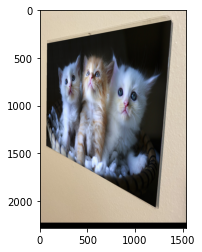

True

In [54]:
directory = "C:/Users/clare/OneDrive - purdue.edu/Desktop/ECE 661/hw2_Task1_Images/"
file_target = "painting3.jpeg"
file_source = "kittens.jpeg"
img_target = cv2.imread(directory+file_target,cv2.IMREAD_COLOR)
img_source = cv2.imread(directory+file_source,cv2.IMREAD_COLOR)

H = get_homography(img_cat,img3)
img_new = mapping(img_target,img_source,img_cat,img3,H)
plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite(directory+"task1c.jpeg", img_new) 

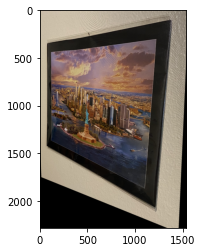

True

In [6]:
directory = "C:/Users/clare/OneDrive - purdue.edu/Desktop/ECE 661/hw2_Task1_Images/"
file_target = "painting3.jpeg"
file_source = "painting1.jpeg"

img_target = cv2.imread(directory+file_target,cv2.IMREAD_COLOR)
img_source = cv2.imread(directory+file_source,cv2.IMREAD_COLOR)

H1 = get_homography(img2,img1)
H2 = get_homography(img3,img2)
H = np.matmul(H2,H1)
img_new = np.zeros(img_target.shape,dtype = np.uint8)

for j in range(img_source.shape[0]):
        for i in range(img_source.shape[1]):
            input = np.array([i,j,1]).reshape((3,1))
            output = np.matmul(H,input)
            x2 = np.int(np.round(output[0]/output[2]))
            y2 = np.int(np.round(output[1]/output[2]))
            
            if (x2>0) and (x2<img_target.shape[1]) and (y2>0) and (y2<img_target.shape[0]):
                img_new[y2,x2,:] = img_source[j,i,:]

plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite(directory+"task1-2.jpeg", img_new) 

In [56]:
img1 = np.array([[641,1161],[1143,2615],[3853,1551],[2809,612]])
img2 = np.array([[683,574],[1339,2958],[3556,1969],[3080,447]])
img3 = np.array([[1107,340],[176,1486],[3463,2308],[3524,725]])
img_face = np.array([[414,959],[319,3284],[2722,3302],[2654,996]])

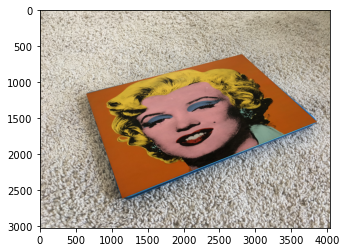

True

In [57]:
directory = "C:/Users/clare/OneDrive - purdue.edu/Desktop/ECE 661/hw2_Task1_Images/"
file_target = "mypic1.JPG"
file_source = "face.JPG"
img_target = cv2.imread(directory+file_target,cv2.IMREAD_COLOR)
img_source = cv2.imread(directory+file_source,cv2.IMREAD_COLOR)

H = get_homography(img_face,img1)
img_new = mapping(img_target,img_source,img_face,img1,H)
plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite(directory+"task2a.jpeg", img_new) 

In [59]:
directory = "C:/Users/clare/OneDrive - purdue.edu/Desktop/ECE 661/hw2_Task1_Images/"
file_target = "mypic2.JPG"
file_source = "face.JPG"
img_target = cv2.imread(directory+file_target,cv2.IMREAD_COLOR)
img_source = cv2.imread(directory+file_source,cv2.IMREAD_COLOR)

H = get_homography(img_face,img2)

img_new = mapping(img_target,img_source,img_face,img2,H)
plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite(directory+"task2b.jpeg", img_new) 

True

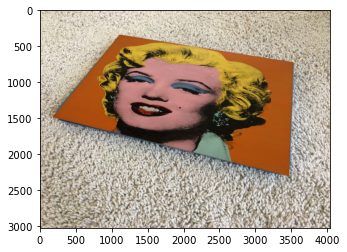

True

In [60]:
directory = "C:/Users/clare/OneDrive - purdue.edu/Desktop/ECE 661/hw2_Task1_Images/"
file_target = "mypic3.JPG"
file_source = "face.JPG"
img_target = cv2.imread(directory+file_target,cv2.IMREAD_COLOR)
img_source = cv2.imread(directory+file_source,cv2.IMREAD_COLOR)

H = get_homography(img_face,img3)
img_new = mapping(img_target,img_source,img_face,img3,H)
plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite(directory+"task2c.jpeg", img_new) 

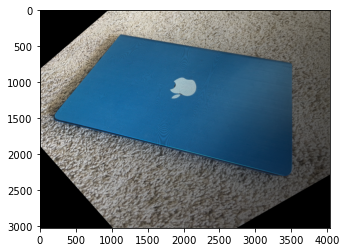

True

In [61]:
directory = "C:/Users/clare/OneDrive - purdue.edu/Desktop/ECE 661/hw2_Task1_Images/"
file_target = "mypic1.JPG"
img_target = cv2.imread(directory+file_target,cv2.IMREAD_COLOR)

H1 = get_homography(img2,img1)
H2 = get_homography(img3,img2)
H = np.matmul(H2,H1)
img_new = np.zeros(img_target.shape,dtype = np.uint8)

for j in range(img_target.shape[0]):
        for i in range(img_target.shape[1]):
            input = np.array([i,j,1]).reshape((3,1))
            output = np.matmul(H,input)
            x2 = np.int(np.round(output[0]/output[2]))
            y2 = np.int(np.round(output[1]/output[2]))
            
            if (x2>0) and (x2<img_target.shape[1]) and (y2>0) and (y2<img_target.shape[0]):
                img_new[y2,x2,:] = img_target[j,i,:]

plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite(directory+"task2-2.jpeg", img_new) 